In [1]:
import zipfile

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Copy of devnagari digit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [12]:
# generators -> divide all the data to batches
# each time batch is loaded on RAM and remove after job done and
# process continues until all batches done
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)



Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.


In [13]:
#normalize -> for value (0 to 255) to (0 to 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [14]:
#prediction
import cv2

test_image1_0 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Train/digit_0/103265.png')
test_image2_9 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_9/10407.png')
test_image2_2 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_2/12535.png')





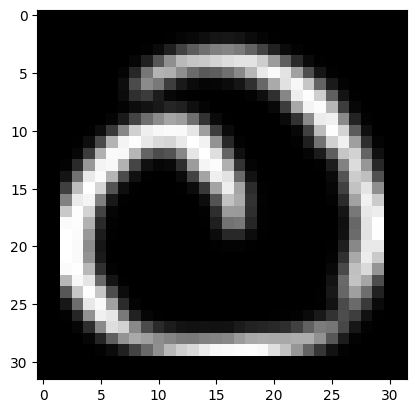

In [15]:
import matplotlib.pyplot as plt
plt.imshow(test_image1_0)

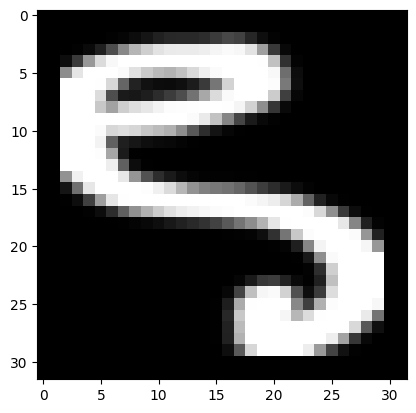

In [16]:
plt.imshow(test_image2_9)

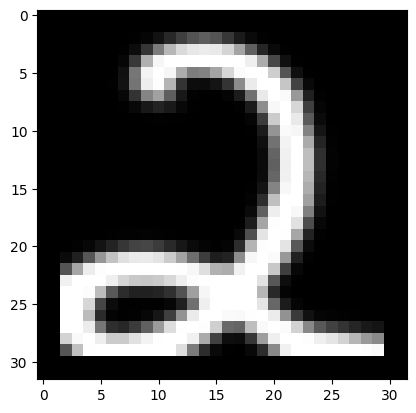

In [17]:
plt.imshow(test_image2_2)

In [18]:
test_image2_9.shape

(32, 32, 3)

In [19]:
#decreasing image size
test_image1 = cv2.resize(test_image2_9,(256,256)) # Resized to (256, 256)
test_image2 = cv2.resize(test_image1_0,(256,256)) # Resized to (256, 256)
test_image3 = cv2.resize(test_image2_2,(256,256)) # Resized to (256, 256)



In [20]:
#reshaping image shape
test_input1 = test_image1.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input2 = test_image2.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input3 = test_image3.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)

In [21]:
#using ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [22]:
# Normalize the pixel values to range [0,1]
normalization_layer = keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))


In [38]:

ann_model = Sequential()
ann_model.add(Flatten(input_shape=(256, 256, 3)))
ann_model.add(Dense(64, activation='sigmoid'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128, activation='sigmoid'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(256, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='softmax'))

In [24]:
# Compile the model
ann_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [25]:
# Summary of the model
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      12,582,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,626,890 (48.17 MB)

 Trainable params: 12,626,890 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model using the data generators
history = ann_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 86s 625ms/step - accuracy: 0.1524 - loss: 2.2854 - val_accuracy: 0.6813 - val_loss: 1.2306
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 151s 693ms/step - accuracy: 0.6695 - loss: 1.0546 - val_accuracy: 0.8397 - val_loss: 0.4853
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 132s 618ms/step - accuracy: 0.8033 - loss: 0.5490 - val_accuracy: 0.8860 - val_loss: 0.3498
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 631ms/step - accuracy: 0.8531 - loss: 0.4094 - val_accuracy: 0.9140 - val_loss: 0.2728
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 141s 622ms/step - accuracy: 0.8834 - loss: 0.3386 - val_accuracy: 0.9337 - val_loss: 0.2240
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 143s 628ms/step - accuracy: 0.9012 - loss: 0.2925 - val_accuracy: 0.9463 - val_loss: 0.1919
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 94s 708ms/step - accuracy: 0.9155 - loss: 0.2478 - val_accuracy: 0.9517 - val_loss: 0.1677
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 126s 590ms/step - accuracy: 0.9241 - lo

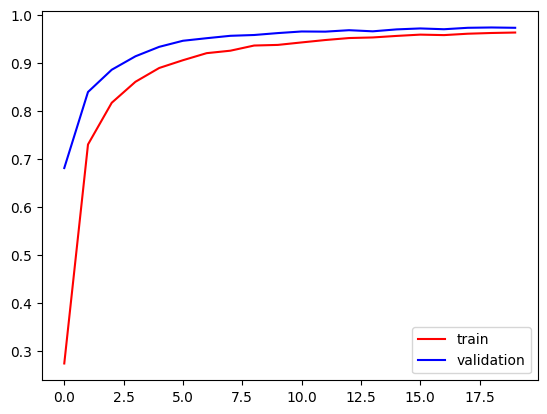

In [27]:
#accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

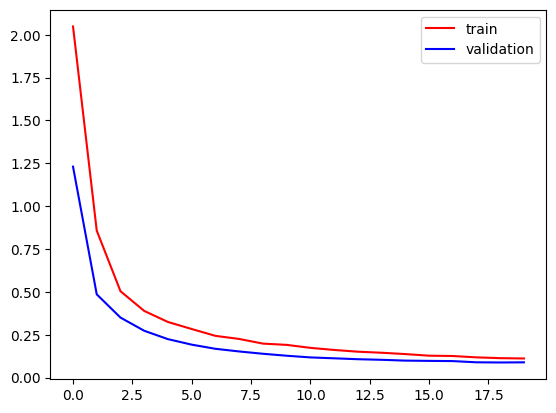

In [28]:
#losss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [29]:
test_input3.shape

(1, 256, 256, 3)

In [30]:
pred = ann_model.predict(test_input3) #2
pred_digit = np.argmax(pred)
print(f"predicted output image value is {pred_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
predicted output image value is 2


In [31]:
import numpy as np
# Predict on test data
predictions = ann_model.predict(validation_ds)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step


In [32]:
print("Prediction : ",predictions[0])
print("Predicted label : ",predicted_labels[0])
print("Prdection shape", predictions[0].shape)


Prediction :  [8.9113827e-10 2.2189646e-09 5.0614279e-05 1.0547679e-03 1.2735657e-04
 9.9873096e-01 1.2520568e-05 2.3328186e-05 2.9898214e-07 1.8560381e-07]
Predicted label :  5
Prdection shape (10,)


In [33]:
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")


Predicted label for first image: 5


In [34]:
# Get the shape of the first image in the validation dataset
for image, label in validation_ds.take(2):
  print("Image shape:", image.shape)
  print("Label shape:", label.shape)


Image shape: (128, 256, 256, 3)
Label shape: (128,)
Image shape: (128, 256, 256, 3)
Label shape: (128,)


In [43]:
ann_model.save("ann_model.h5")

# Loading Saved Model

In [44]:
loaded_model = tf.keras.models.load_model("ann_model.h5")

In [45]:
predict1 = loaded_model.predict(test_input3) #image is 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [46]:
predicted_digit = np.argmax(predict1)
print("Predicted digit:", predicted_digit)

Predicted digit: 2
